In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.ticker import FuncFormatter

%matplotlib inline

# Rat sightings in NYC 

I got my data set from NYC Open Data. It lists all 311 Service Requests from 2010 to present. The information is automatically updated daily. 

I want to know which NYC boroughs have the most complaints, what type of location is the most common and if the number of complaints is increasing over the years.



In [2]:
df = pd.read_csv("Rat_Sightings.csv", low_memory=False)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,15633054,01/01/2010 11:20:45 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11365.0,59-13 159 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.739983,-73.809299,"(40.73998332248969, -73.80929891501533)"
1,15633304,01/02/2010 12:50:36 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10016.0,2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.743161,-73.976983,"(40.74316088098852, -73.97698314758436)"
2,15633594,01/01/2010 03:05:37 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11377.0,31-14 58 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.756987,-73.903618,"(40.756986581184535, -73.90361811283164)"
3,15633599,01/01/2010 08:52:19 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11201.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688903,-73.980929,"(40.68890317557533, -73.98092864957985)"
4,15633605,01/01/2010 04:14:27 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10467.0,2504 BRONX PARK EAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.863614,-73.870441,"(40.8636140600279, -73.87044117516707)"


In [4]:
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                     float64
Status                             object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough                           

In [5]:
df['City'].value_counts()

BROOKLYN            39982
NEW YORK            30100
BRONX               23309
STATEN ISLAND        5484
Jamaica              1457
JAMAICA              1029
Ridgewood             967
RIDGEWOOD             824
Astoria               730
Woodside              540
Flushing              452
ASTORIA               451
WOODSIDE              399
Corona                357
Elmhurst              350
Long Island City      349
Ozone Park            343
Jackson Heights       333
Saint Albans          316
LONG ISLAND CITY      301
FLUSHING              266
Maspeth               252
ELMHURST              241
Middle Village        238
Queens Village        229
CORONA                226
Rego Park             226
SAINT ALBANS          220
MASPETH               218
East Elmhurst         215
                    ...  
CAMBRIA HEIGHTS        47
Little Neck            45
OAKLAND GARDENS        42
COLLEGE POINT          38
ARVERNE                34
Floral Park            27
Oakland Gardens        25
ROCKAWAY PAR

# Where are all these rats?

**Which boroughs have the biggest number of complaints?**

In [14]:
df.Borough.value_counts()

BROOKLYN         40114
MANHATTAN        30261
BRONX            23356
QUEENS           16899
STATEN ISLAND     5511
Unspecified          8
Name: Borough, dtype: int64

In [12]:
df.groupby('year').Borough.value_counts()

year  Borough      
2010  BROOKLYN         3399
      MANHATTAN        2867
      BRONX            2067
      QUEENS           1569
      STATEN ISLAND     632
2011  BROOKLYN         3671
      MANHATTAN        2461
      BRONX            2174
      QUEENS           1600
      STATEN ISLAND     548
2012  BROOKLYN         3600
      MANHATTAN        2857
      BRONX            2125
      QUEENS           1522
      STATEN ISLAND     538
      Unspecified         1
2013  BROOKLYN         3300
      MANHATTAN        3018
      BRONX            2120
      QUEENS           1660
      STATEN ISLAND     641
2014  BROOKLYN         3968
      MANHATTAN        3541
      BRONX            2743
      QUEENS           1748
      STATEN ISLAND     617
2015  BROOKLYN         5263
      MANHATTAN        4123
      BRONX            3189
      QUEENS           2103
      STATEN ISLAND     594
2016  BROOKLYN         5979
      MANHATTAN        4610
      BRONX            3497
      QUEENS           2410


In [20]:
pd.set_option('display.max_rows', None)  

df.groupby('year')['Community Board'].value_counts()

# Bed-Stuy, UWS, Harlem were the neighborhoods with the most complaints in 2017 

year  Community Board          
2010  Unspecified BROOKLYN          673
      07 MANHATTAN                  444
      Unspecified MANHATTAN         444
      Unspecified BRONX             382
      03 BROOKLYN                   354
      08 MANHATTAN                  298
      12 MANHATTAN                  284
      12 QUEENS                     278
      10 MANHATTAN                  267
      03 MANHATTAN                  261
      09 MANHATTAN                  245
      05 BROOKLYN                   239
      04 BRONX                      234
      Unspecified QUEENS            232
      07 BRONX                      226
      04 BROOKLYN                   223
      05 QUEENS                     219
      06 BROOKLYN                   214
      01 BROOKLYN                   213
      03 STATEN ISLAND              203
      09 BROOKLYN                   195
      01 STATEN ISLAND              177
      08 BROOKLYN                   174
      05 BRONX                      165
      12

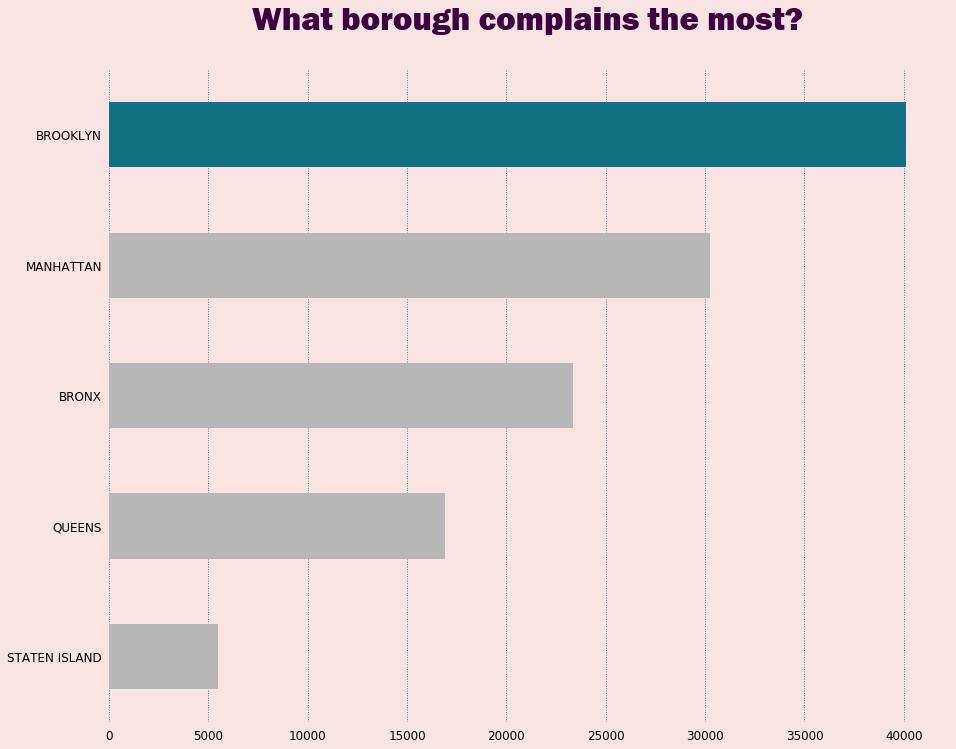

In [179]:
colors = ['#b7b7b7', '#b7b7b7', '#b7b7b7', '#b7b7b7', '#137083']

ax = df.Borough.value_counts().sort_values(ascending=True).tail(5).plot(kind='barh', color=colors, figsize=(15,12))

ax.set_title('What borough complains the most?', pad=40)
ax.title.set_fontsize(15)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
ax.grid(True, axis='x', color='#137083', linestyle=':', linewidth=0.9)

ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#fae3e3', # colors the outside
    'axes.facecolor': '#fae3e3', # colors the inside 
    'font.size': 12,
    'text.color': '#3d0240' 
})

#plt.savefig('rats-borough.pdf')

In [42]:
df_borough = pd.DataFrame({
    'borough': ['Brooklyn', 'Manhattan', 'Bronx', 'Queens', 'Staten Island'],
    'number_of_complaints': [40114/100, 30261/100, 23356/100, 16899/100, 5511/100]
})
df_borough

,borough,number_of_complaints
0,Brooklyn,401.14
1,Manhattan,302.61
2,Bronx,233.56
3,Queens,168.99
4,Staten Island,55.11


In [41]:
df_borough_population = pd.DataFrame({
    'borough': ['Manhattan', 'Bronx', 'Brooklyn', 'Staten Island', 'Queens'],
    'number_of_complaints': [30261/1665000*10000, 23356/1471000*10000, 40114/2649000*10000, 5511/479458*10000, 16899/2359000*10000]
})
df_borough_population

,borough,number_of_complaints
0,Manhattan,181.747748
1,Bronx,158.776343
2,Brooklyn,151.430729
3,Staten Island,114.942289
4,Queens,71.636287


c:\users\júlia ledur\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


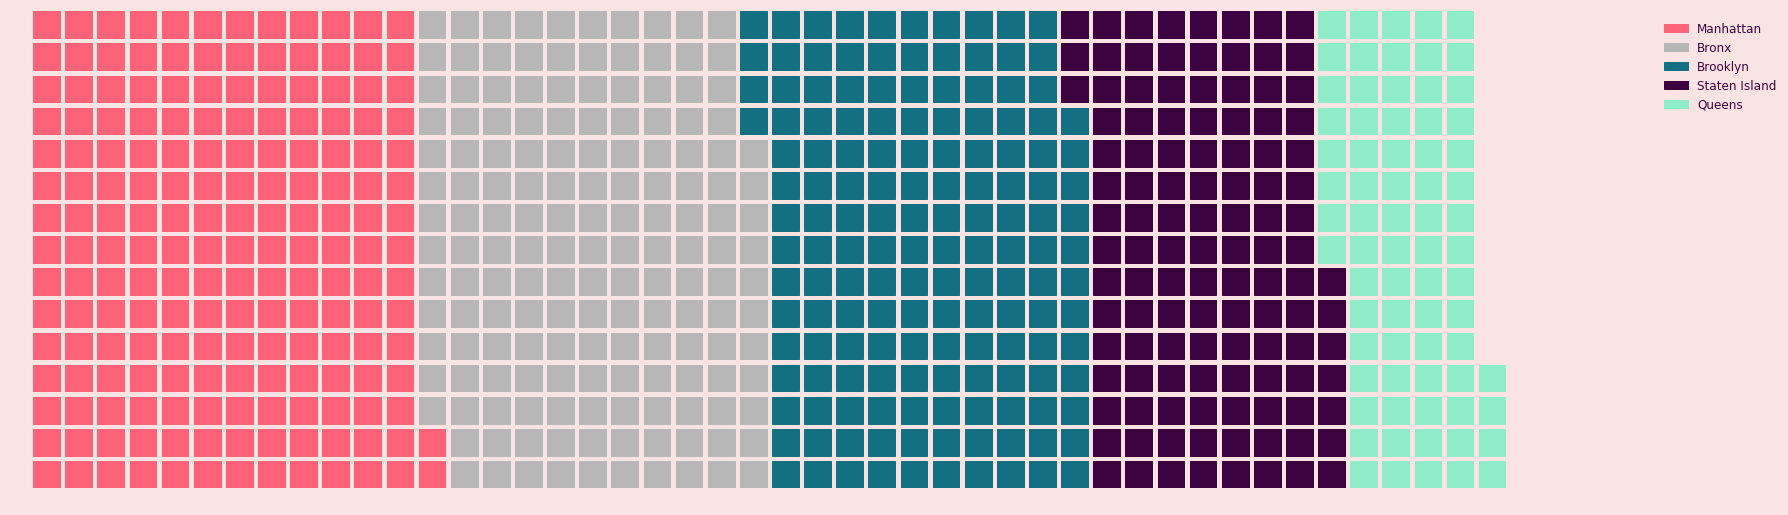

In [43]:
# WEIGHTED VERSION BY BOROUGH POPULATION


fig = plt.figure(
    FigureClass=Waffle, 
    rows=15,
    values=df_borough_population.number_of_complaints,
    labels=list(df_borough_population.borough),
    figsize=(25, 25),
    colors=("#fd6378", "#b7b7b7", "#137083", "#3d0240", '#8fecc8'),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1), 'framealpha': 0}
)

fig.gca().set_facecolor('#fae3e3')
fig.set_facecolor('#fae3e3')

plt.savefig("rats-borough-population.pdf")

In [41]:
df_borough.number_of_complaints.sum()

116141

c:\users\júlia ledur\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


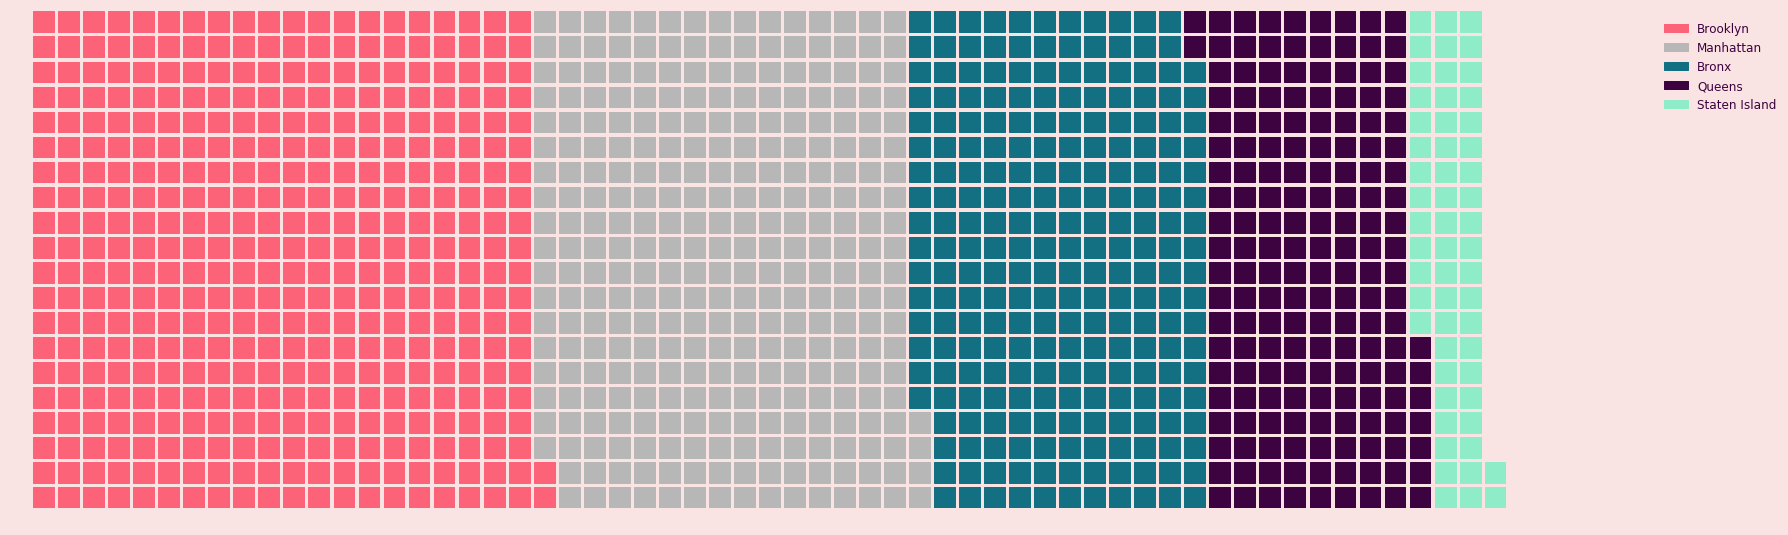

In [50]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=20,
    values=df_borough.number_of_complaints,
    labels=list(df_borough.borough),
    figsize=(25, 25),
    colors=("#fd6378", "#b7b7b7", "#137083", "#3d0240", '#8fecc8'),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1), 'framealpha': 0}
)

fig.gca().set_facecolor('#fae3e3')
fig.set_facecolor('#fae3e3')

plt.savefig("rats-borough-waffle.pdf")

In [7]:
df['Community Board'].value_counts()

Unspecified BROOKLYN         9148
Unspecified MANHATTAN        7630
03 BROOKLYN                  4785
Unspecified BRONX            4296
07 MANHATTAN                 3684
04 BROOKLYN                  3149
Unspecified QUEENS           3111
10 MANHATTAN                 2874
12 MANHATTAN                 2820
08 BROOKLYN                  2743
01 BROOKLYN                  2699
04 BRONX                     2555
03 MANHATTAN                 2523
12 QUEENS                    2467
08 MANHATTAN                 2339
05 QUEENS                    2166
07 BRONX                     2110
09 BROOKLYN                  2080
05 BRONX                     2072
01 STATEN ISLAND             2039
05 BROOKLYN                  2007
06 BROOKLYN                  1983
09 MANHATTAN                 1970
02 BROOKLYN                  1922
17 BROOKLYN                  1858
12 BRONX                     1727
06 BRONX                     1702
11 BRONX                     1672
11 MANHATTAN                 1599
09 BRONX      

Looks like people complain more in Brooklyn, followed by Manhattan. 
More specifically: 
- 03 Brooklyn: Bedford-Stuyvesant, Stuyvesant Heights, and Ocean Hill
- 07 Manhattan: Upper West Side
- 04 Brooklyn: Bushwick and Ridgewood
- 10 Manhattan: Central Harlem

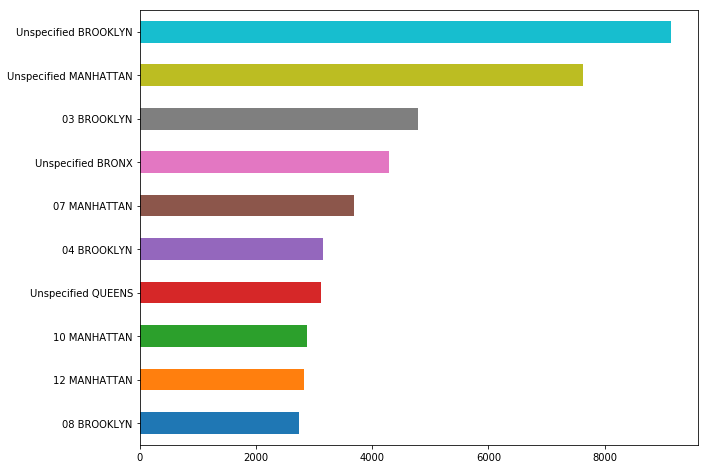

In [54]:
df['Community Board'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', figsize=(10,8))

**In what kind of location are these rats?**

In [56]:
df['Location Type'].value_counts()

3+ Family Apt. Building          47309
1-2 Family Dwelling              22254
Other (Explain Below)            17082
3+ Family Mixed Use Building      8933
Commercial Building               5857
Vacant Lot                        4002
Construction Site                 2663
Vacant Building                   2101
1-2 Family Mixed Use Building     1978
Catch Basin/Sewer                 1197
Parking Lot/Garage                1013
Public Garden                      584
Government Building                314
School/Pre-School                  200
Single Room Occupancy (SRO)        185
Day Care/Nursery                   142
Public Stairs                      132
Office Building                    100
Hospital                            90
Summer Camp                          7
Name: Location Type, dtype: int64

In [52]:
commercial = df[df['Location Type'] == 'Commercial Building']
commercial['Incident Address'].value_counts()

1095 ATLANTIC AVENUE         18
174 ORCHARD STREET           15
783 EAST 169TH STREET        14
253-06 HILLSIDE AVENUE       13
1825 FOREST AVENUE           12
1119 ATLANTIC AVENUE         12
1266 BEDFORD AVENUE          10
999 ATLANTIC AVENUE          10
127 LEFFERTS PLACE           10
40 HEYWARD STREET            10
490 HUDSON STREET             9
2102 WEBSTER AVENUE           8
472 ATLANTIC AVENUE           7
401 7 AVENUE                  7
188 PROSPECT PARK WEST        7
16 CARO STREET                7
910 FULTON STREET             7
113 LENOX AVENUE              6
17-17 TROUTMAN STREET         6
1562 FULTON STREET            6
2041 7 AVENUE                 6
775 WOODWARD AVENUE           6
88 FULTON STREET              5
1998 BRUCKNER BOULEVARD       5
37 AVENUE                     5
45-46 BELL BOULEVARD          5
527 FRANKLIN AVENUE           5
231 THOMPSON STREET           5
30 BARRETT AVENUE             5
260 EAST 161 STREET           5
                             ..
310 EAST

In [71]:
df['Incident Address'].str.extract(r'^\d+ ([0-9*A-Z]*[A-Z]*)')

,0
0,NaN
1,AVENUE
2,NaN
3,NaN
4,BRONX
5,PULASKI
6,CONEY
7,WEST
8,LORILLARD
9,FULTON


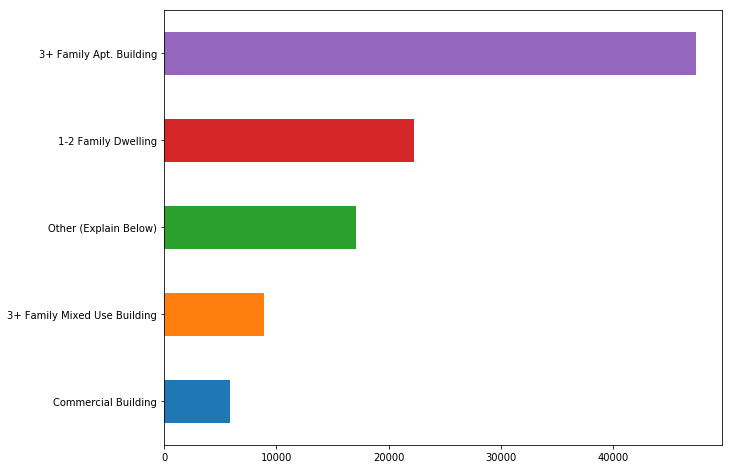

In [60]:
df['Location Type'].value_counts().head(5).sort_values(ascending=True).plot(kind='barh',figsize=(10,8))

In [78]:
df['Street Name'].value_counts()

EASTERN PARKWAY                  817
BROADWAY                         802
GRAND CONCOURSE                  779
LAFAYETTE AVENUE                 422
LEXINGTON AVENUE                 413
FULTON STREET                    407
GREENE AVENUE                    405
WALLACE AVENUE                   403
DEAN STREET                      390
BEDFORD AVENUE                   384
PUTNAM AVENUE                    383
JEFFERSON AVENUE                 373
MADISON STREET                   350
DEKALB AVENUE                    337
HANCOCK STREET                   331
AMSTERDAM AVENUE                 331
HALSEY STREET                    324
PACIFIC STREET                   320
UNION STREET                     320
MORRIS AVENUE                    315
BUSHWICK AVENUE                  314
ATLANTIC AVENUE                  311
PARK PLACE                       309
PROSPECT AVENUE                  308
WASHINGTON AVENUE                303
BERGEN STREET                    300
WALTON AVENUE                    297
B

EASTERN PARKWAY and BROADWAY are the street with the most complaints.

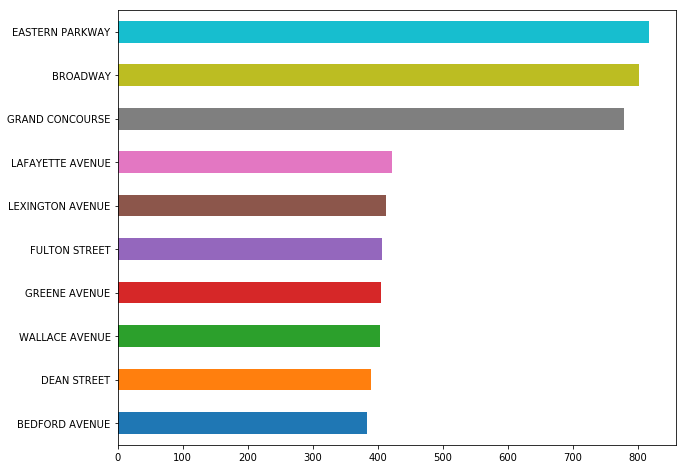

In [82]:
df['Street Name'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', figsize=(10,8))

In [49]:
# Let's see if we can find something interesting in the incident addresses 

df['Incident Address'].value_counts()

95 EASTERN PARKWAY        208
2131 WALLACE AVENUE       196
410 EASTERN PARKWAY       143
651 BROOKLYN AVENUE       143
2486 DAVIDSON AVE          88
1025 BOYNTON AVENUE        68
101 LINCOLN ROAD           53
570 W 204TH ST             51
46-01 67 STREET            51
407 LINCOLN PLACE          51
120 WEST 94TH STREET       51
27 ARION PLACE             50
551 WEST 204TH STREET      47
1201 OCEAN PARKWAY         47
1800 POPHAM AVENUE         46
229 WEST 109 STREET        44
DEAN STREET                43
750 GRAND CONCOURSE        43
1248 ST MARKS AVENUE       43
PUTNAM AVENUE              42
1079 DEKALB AVENUE         42
28 MARKET STREET           42
153 NORFOLK STREET         41
80 NEW YORK AVENUE         39
770 BRYANT AVENUE          39
230 WEST 107 STREET        39
2486 DAVIDSON AVENUE       39
666 WEST END AVENUE        38
120 WEST   94 STREET       38
EAST 93 STREET             36
                         ... 
213 ESSEX STREET            1
25 HOWARD STREET            1
2258 ATLAN

# Are people complaining more?

**Is the number of complaints increasing?**

Let's create a column for year and find out. 

In [7]:
df['year'] = df['Created Date'].str.extract(r'([0-9][0-9][0-9][0-9])', expand=True)

In [8]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,year
0,15633054,01/01/2010 11:20:45 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11365.0,59-13 159 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.739983,-73.809299,"(40.73998332248969, -73.80929891501533)",2010
1,15633304,01/02/2010 12:50:36 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10016.0,2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.743161,-73.976983,"(40.74316088098852, -73.97698314758436)",2010
2,15633594,01/01/2010 03:05:37 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11377.0,31-14 58 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.756987,-73.903618,"(40.756986581184535, -73.90361811283164)",2010
3,15633599,01/01/2010 08:52:19 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11201.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.688903,-73.980929,"(40.68890317557533, -73.98092864957985)",2010
4,15633605,01/01/2010 04:14:27 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10467.0,2504 BRONX PARK EAST,...,NaN,NaN,NaN,NaN,NaN,NaN,40.863614,-73.870441,"(40.8636140600279, -73.87044117516707)",2010


In [5]:
df.year.value_counts()

2017    19152
2016    17230
2015    15272
2014    12617
2013    10739
2012    10643
2010    10534
2011    10454
2018     9508
Name: year, dtype: int64

Looks like the number of complaints is getting bigger and bigger over the years.

In [9]:
df['month'] = df['Created Date'].str.extract(r'([0-9][0-9])/', expand=True)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,year,month
0,15633054,01/01/2010 11:20:45 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11365.0,59-13 159 STREET,...,NaN,NaN,NaN,NaN,NaN,40.739983,-73.809299,"(40.73998332248969, -73.80929891501533)",2010,01
1,15633304,01/02/2010 12:50:36 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10016.0,2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.743161,-73.976983,"(40.74316088098852, -73.97698314758436)",2010,01
2,15633594,01/01/2010 03:05:37 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11377.0,31-14 58 STREET,...,NaN,NaN,NaN,NaN,NaN,40.756987,-73.903618,"(40.756986581184535, -73.90361811283164)",2010,01
3,15633599,01/01/2010 08:52:19 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11201.0,NaN,...,NaN,NaN,NaN,NaN,NaN,40.688903,-73.980929,"(40.68890317557533, -73.98092864957985)",2010,01
4,15633605,01/01/2010 04:14:27 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10467.0,2504 BRONX PARK EAST,...,NaN,NaN,NaN,NaN,NaN,40.863614,-73.870441,"(40.8636140600279, -73.87044117516707)",2010,01


/Users/julialedur/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Franklin Gothic Heavy'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


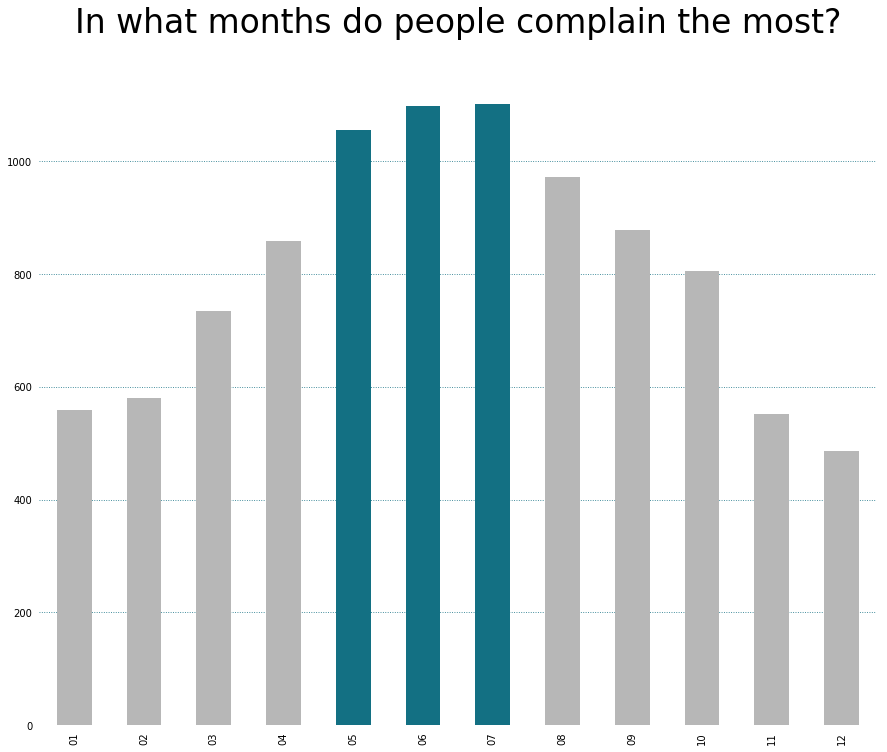

In [10]:

colors = ['#b7b7b7', '#b7b7b7', '#b7b7b7', '#b7b7b7', '#137083', '#137083', '#137083',]

ax = (df.month.value_counts() / 12).sort_index().plot(kind='bar', color=colors, figsize=(15,12))

ax.set_title('In what months do people complain the most?', pad=40)
ax.title.set_fontsize(15)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
ax.grid(True, axis='y', color='#137083', linestyle=':', linewidth=0.9)

ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#fae3e3', # colors the outside
    'axes.facecolor': '#fae3e3', # colors the inside 
    'font.size': 12,
    'text.color': '#3d0240' 
})

plt.savefig("rat-months.pdf")


**Let's turn the date column into a datetime so we can plot it!**

In [13]:
#01/01/2010 11:20:45 AM

df['date'] = pd.to_datetime(df['Created Date'], format="%m/%d/%Y %I:%M:%S %p") 
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,year,month,date
0,15633054,01/01/2010 11:20:45 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11365.0,59-13 159 STREET,...,NaN,NaN,NaN,NaN,40.739983,-73.809299,"(40.73998332248969, -73.80929891501533)",2010,01,2010-01-01 11:20:45
1,15633304,01/02/2010 12:50:36 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10016.0,2 AVENUE,...,NaN,NaN,NaN,NaN,40.743161,-73.976983,"(40.74316088098852, -73.97698314758436)",2010,01,2010-01-02 00:50:36
2,15633594,01/01/2010 03:05:37 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11377.0,31-14 58 STREET,...,NaN,NaN,NaN,NaN,40.756987,-73.903618,"(40.756986581184535, -73.90361811283164)",2010,01,2010-01-01 15:05:37
3,15633599,01/01/2010 08:52:19 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11201.0,NaN,...,NaN,NaN,NaN,NaN,40.688903,-73.980929,"(40.68890317557533, -73.98092864957985)",2010,01,2010-01-01 20:52:19
4,15633605,01/01/2010 04:14:27 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10467.0,2504 BRONX PARK EAST,...,NaN,NaN,NaN,NaN,40.863614,-73.870441,"(40.8636140600279, -73.87044117516707)",2010,01,2010-01-01 16:14:27


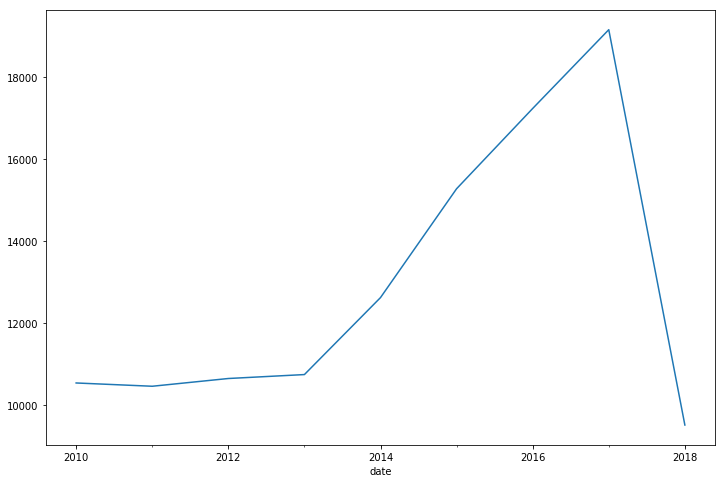

In [11]:
# By year 

df.resample('Y', on='date').count().date.plot(figsize=(12,8))

In [54]:
df.resample('M', on='date').count().date.sort_values(ascending=False)

date
2017-07-31    2199
2017-08-31    2011
2015-07-31    1893
2018-05-31    1889
2017-06-30    1882
2018-06-30    1869
2016-08-31    1854
2016-06-30    1840
2016-05-31    1813
2016-09-30    1775
2016-07-31    1769
2017-10-31    1756
2017-05-31    1739
2017-09-30    1711
2017-04-30    1688
2015-09-30    1613
2015-08-31    1550
2015-06-30    1550
2016-10-31    1524
2015-10-31    1501
2015-05-31    1497
2017-02-28    1494
2014-10-31    1417
2014-08-31    1415
2014-06-30    1411
2017-03-31    1406
2014-07-31    1397
2018-04-30    1397
2010-08-31    1321
2014-09-30    1304
              ... 
2014-11-30     856
2013-10-31     855
2013-03-31     838
2011-10-31     835
2010-03-31     831
2011-03-31     825
2012-04-30     798
2012-03-31     791
2014-03-31     782
2014-12-31     747
2013-01-31     729
2015-01-31     728
2012-01-31     669
2010-11-30     651
2013-02-28     640
2012-12-31     640
2015-02-28     608
2011-11-30     595
2012-02-29     589
2013-11-30     569
2011-12-31     568
2012-11

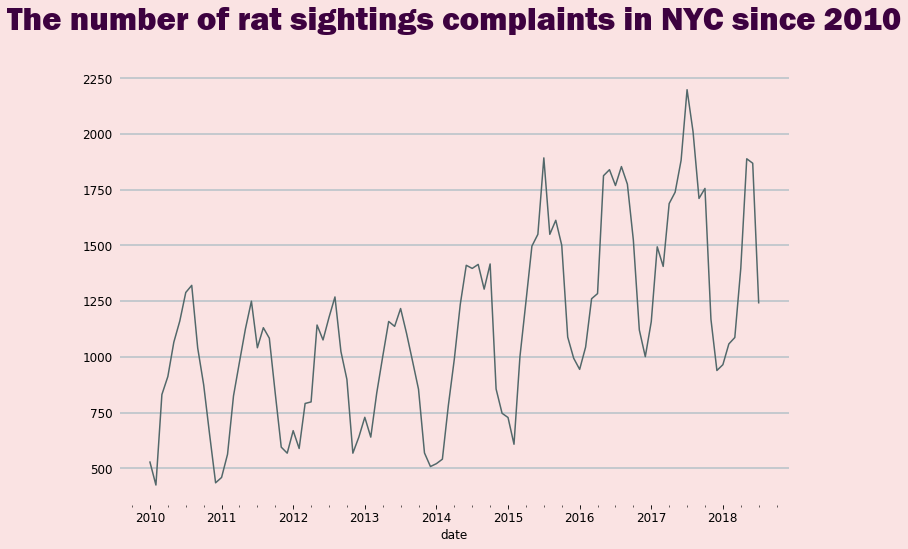

In [44]:
# By month 

ax = df.resample('M', on='date').count().date.plot(figsize=(12,8), color='#52686a')

ax.set_title('The number of rat sightings complaints in NYC since 2010', pad=40)
ax.title.set_fontsize(17)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.tick_params(which='both', left=False, bottom=True, grid_alpha=0.9)
ax.grid(True, axis='y', color='#acbdc5', linestyle='-', linewidth=1.5)

ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#ffded5', # colors the outside
    'axes.facecolor': '#ffded5', # colors the inside 
    'font.size': 12
})

In [23]:
def with_commas(value, pos): 
    return "{:,}".format(int(value))

In [26]:
formatter = FuncFormatter(with_commas)

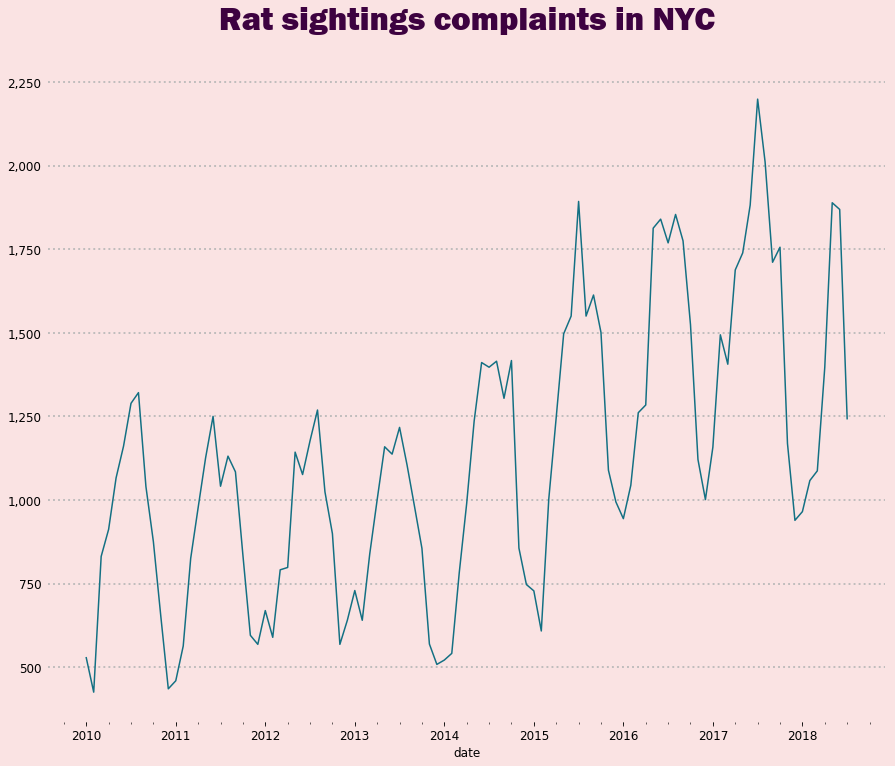

In [29]:
# By month 

ax = df.resample('M', on='date').count().date.plot(figsize=(15,12), color='#137083')

ax.set_title('Rat sightings complaints in NYC', pad=40)
ax.title.set_fontsize(17)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.tick_params(which='both', left=False, bottom=True, grid_alpha=0.9)
ax.grid(True, axis='y', color='#b7b7b7', linestyle=':', linewidth=1.9)

ax.set_axisbelow(True)

ax.yaxis.set_major_formatter(formatter)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#fae3e3', #colors the outside
    'axes.facecolor': '#fae3e3', # colors the inside 
    'font.size': 12,
    'text.color': '#3d0240' 
})

plt.savefig('rat-years-version2.pdf')

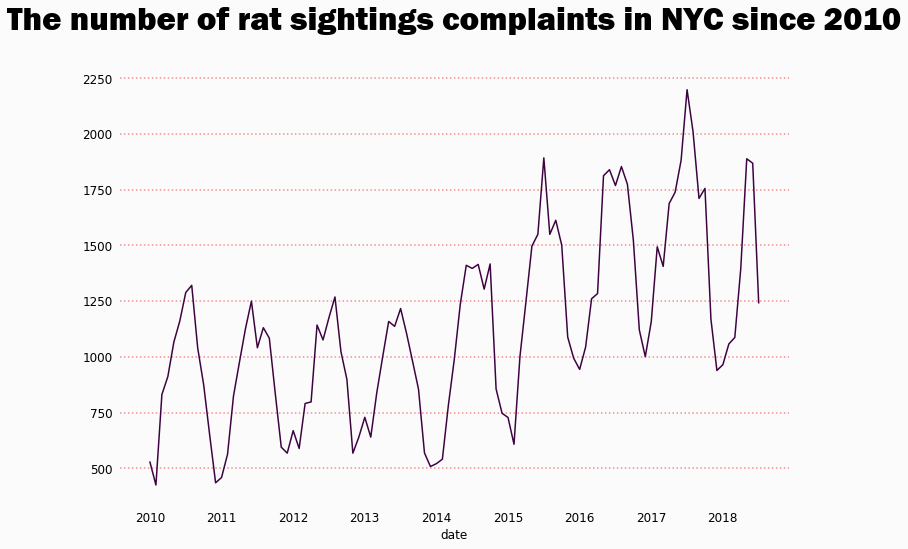

In [20]:
# By month 

ax = df.resample('M', on='date').count().date.plot(figsize=(12,8), color='#3d0240')

ax.set_title('The number of rat sightings complaints in NYC since 2010', pad=40)
ax.title.set_fontsize(17)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
ax.grid(True, axis='y', color='#f38181', linestyle=':', linewidth=1.5)

ax.set_axisbelow(True)


plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#fbfbfb', # colors the outside
    'axes.facecolor': '#fbfbfb', # colors the inside 
    'font.size': 12,
    'text.color': '#000000' 
})



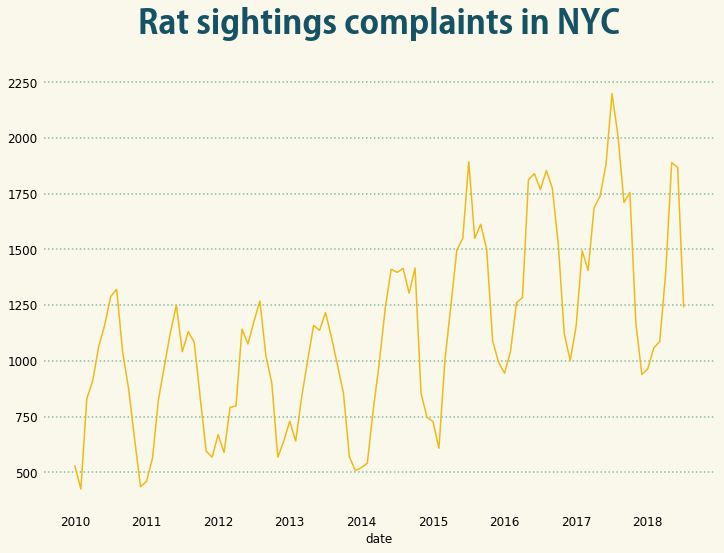

In [138]:
# By month 

ax = df.resample('M', on='date').count().date.plot(figsize=(12,8), color='#f0b917')

ax.set_title('Rat sightings complaints in NYC', pad=40)
ax.title.set_fontsize(17)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.title.set_fontsize(33)
ax.title.set_fontname('Adobe Gothic Std')

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
ax.grid(True, axis='y', color='#76b39d', linestyle=':', linewidth=1.5)

ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#f9f8eb', # colors the outside
    'axes.facecolor': '#f9f8eb', # colors the inside 
    'font.size': 12,
    'text.color': '#155263' 
})

Interesting. Looks like people complaint more in the summer. Why?

Some of the reasons might be: 

- Extra hot summer lead to more rodent babies, experts say.
- Warmer weather means more people in parks leaving food waste for the rats, which breed during the summer.
- That’s when all the garbage is out
- Rats are known for being more aggressive in finding food and preparing themselves for winter during the summer season through the means of stockpiling and nesting.

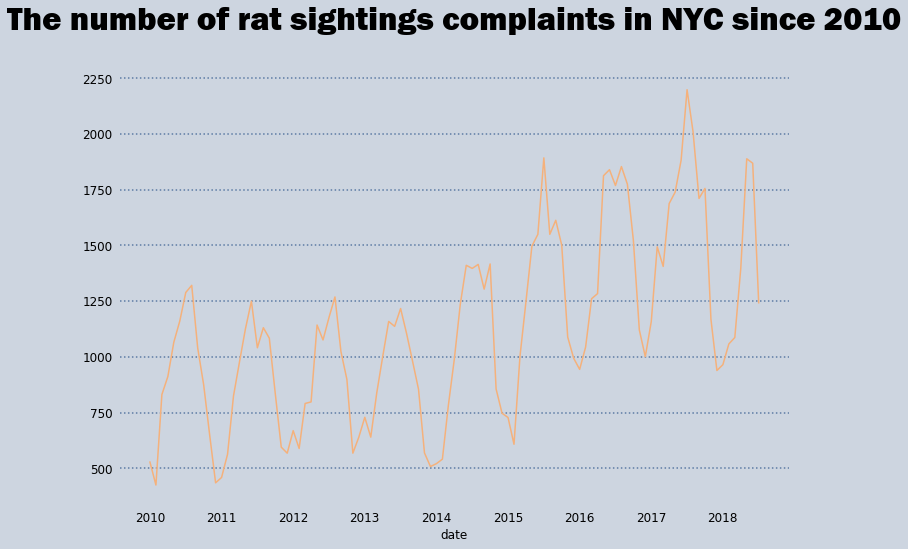

In [153]:
# By month 

ax = df.resample('M', on='date').count().date.plot(figsize=(12,8), color='#f5b17b')

ax.set_title('The number of rat sightings complaints in NYC since 2010', pad=40)
ax.title.set_fontsize(17)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
ax.grid(True, axis='y', color='#4e709d', linestyle=':', linewidth=1.5)

ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#cdd5e0', # colors the outside
    'axes.facecolor': '#cdd5e0', # colors the inside 
    'font.size': 12,
    'text.color': '#000000' 
})



In [33]:
from pywaffle import Waffle

In [18]:
df['Location Type'].value_counts()

3+ Family Apt. Building          47309
1-2 Family Dwelling              22254
Other (Explain Below)            17082
3+ Family Mixed Use Building      8933
Commercial Building               5857
Vacant Lot                        4002
Construction Site                 2663
Vacant Building                   2101
1-2 Family Mixed Use Building     1978
Catch Basin/Sewer                 1197
Parking Lot/Garage                1013
Public Garden                      584
Government Building                314
School/Pre-School                  200
Single Room Occupancy (SRO)        185
Day Care/Nursery                   142
Public Stairs                      132
Office Building                    100
Hospital                            90
Summer Camp                          7
Name: Location Type, dtype: int64

In [21]:
df_waffle = pd.DataFrame({
    'location_type': ['3+ Family Apt. Building', '1-2 Family Dwelling', 'Other', '3+ Family Mixed Use Building', 'Commercial Building','Vacant Lot', 'Construction Site', 'Vacant Building', '1-2 Family Mixed Use Building', 'Catch Basin/Sewer', 'Parking Lot/Garage', 'Public Garden', 'Government Building', 'School/Pre-School', 'Single Room Occupancy (SRO)', 'Day Care/Nursery', 'Public Stairs', 'Office Building', 'Hospital', 'Summer Camp' ],
    'number_of_complaints': [47309/100, 22254/100, 17082/100, 8933/100, 5857/100, 4002/100, 2663/100, 2101/100, 1978/100, 1197/100, 1013/100, 584/100, 314/100, 200/100, 185/100, 142/100, 132/100, 100/100, 90/100, 7/100]
})
df_waffle

,location_type,number_of_complaints
0,3+ Family Apt. Building,473.09
1,1-2 Family Dwelling,222.54
2,Other,170.82
3,3+ Family Mixed Use Building,89.33
4,Commercial Building,58.57
5,Vacant Lot,40.02
6,Construction Site,26.63
7,Vacant Building,21.01
8,1-2 Family Mixed Use Building,19.78
9,Catch Basin/Sewer,11.97


In [184]:
df_waffle.number_of_complaints.sum()

116143

c:\users\júlia ledur\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


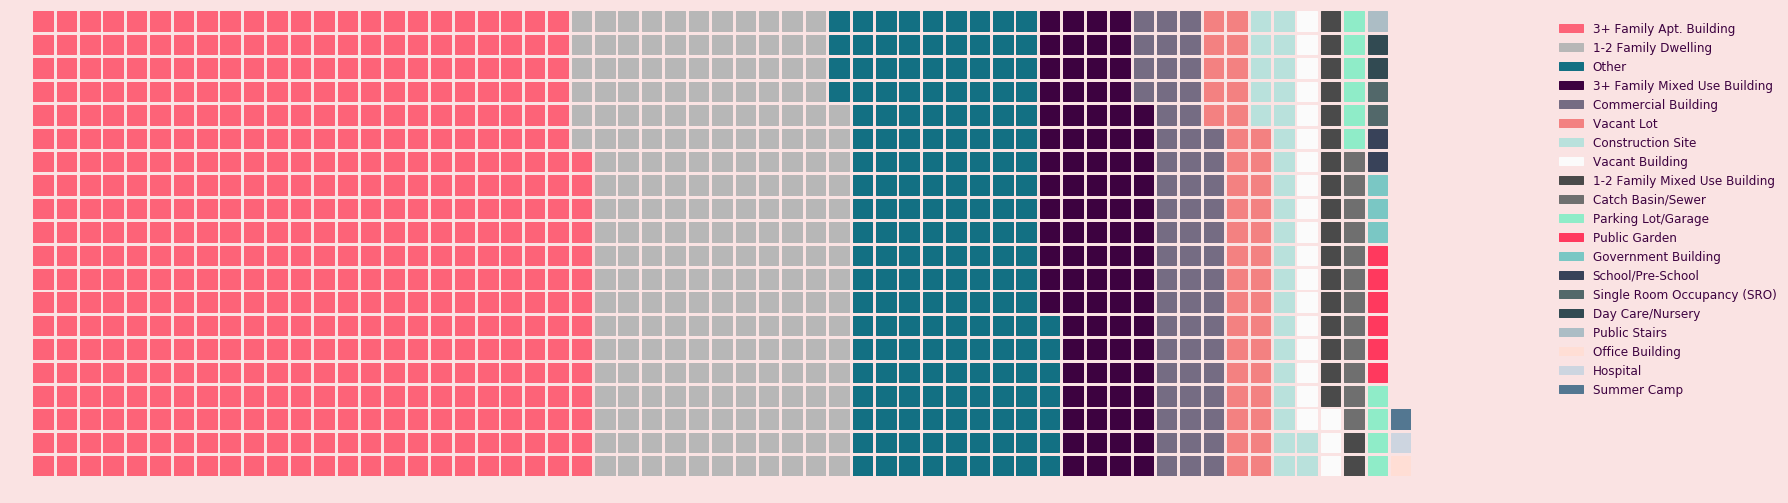

In [31]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=20,
    values=df_waffle.number_of_complaints,
    labels=list(df_waffle.location_type),
    figsize=(25, 25),
    colors=("#fd6378", "#b7b7b7", "#137083", "#3d0240", "#756c83", "#f38181", "#b9e1dc", "#fbfbfb", "#4a4a4a", "#6f6f6f", "#8fecc8", "#ff395e", "#7ac7c4", "#384259", "#52686a", "#314a52", "#acbdc5", "#ffded5", "#cdd5e0", "#537791"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1), 'framealpha': 0}
)

fig.gca().set_facecolor('#fae3e3')
fig.set_facecolor('#fae3e3')

#plt.savefig("rats-location-type.pdf")

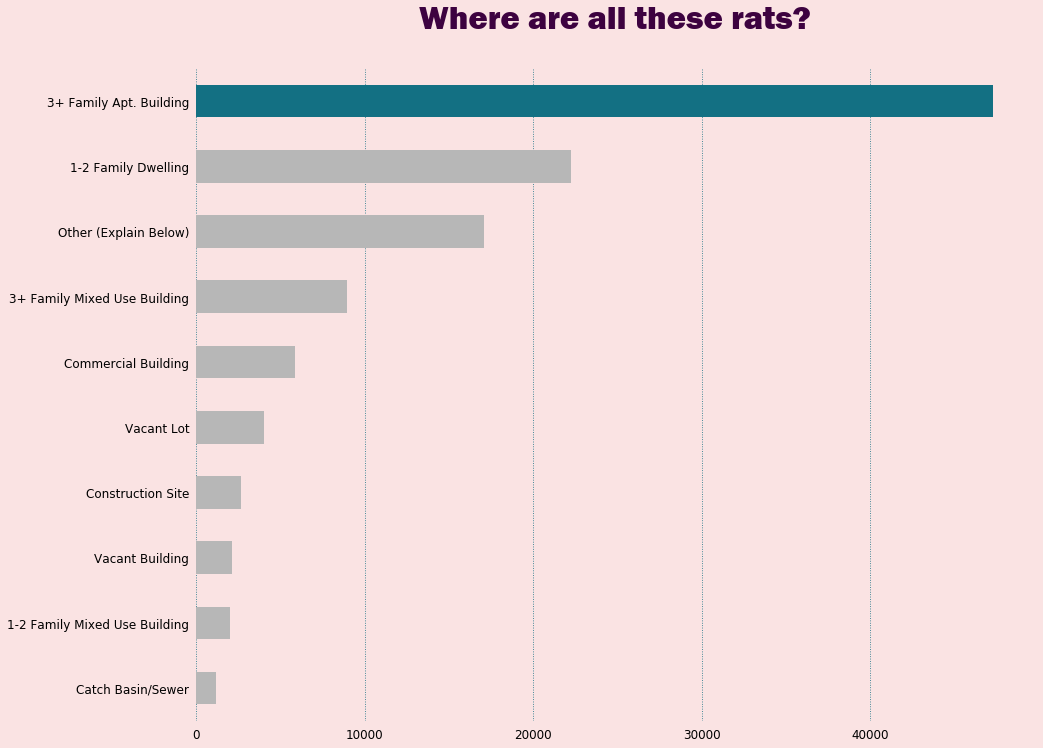

In [39]:
colors = ['#b7b7b7', '#b7b7b7', '#b7b7b7', '#b7b7b7', '#b7b7b7', '#b7b7b7', '#b7b7b7', '#b7b7b7', '#b7b7b7', '#137083']

ax = df['Location Type'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', figsize=(15,12), color=colors)

ax.set_title('Where are all these rats?', pad=40)
ax.title.set_fontsize(15)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
ax.grid(True, axis='x', color='#137083', linestyle=':', linewidth=0.9)

ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#fae3e3', # colors the outside
    'axes.facecolor': '#fae3e3', # colors the inside 
    'font.size': 12,
    'text.color': '#3d0240' 
})

plt.savefig('rats-location.pdf')

In [38]:
df.dtypes

Unique Key                                 int64
Created Date                              object
Closed Date                               object
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                            float64
Status                                    object
Due Date            

In [82]:
df_locations = pd.DataFrame({
    'location_type': ['Family Apartment Building', 'Family Dwelling', 'Family Mixed Use Building', 'Commercial Building', 'Vacant Lot or Building', 'Construction Site'],
    'number_of_complaints': [47309, 22254, 10911, 5857, 6103, 2663]
})
df_locations

,location_type,number_of_complaints
0,Family Apartment Building,47309
1,Family Dwelling,22254
2,Family Mixed Use Building,10911
3,Commercial Building,5857
4,Vacant Lot or Building,6103
5,Construction Site,2663


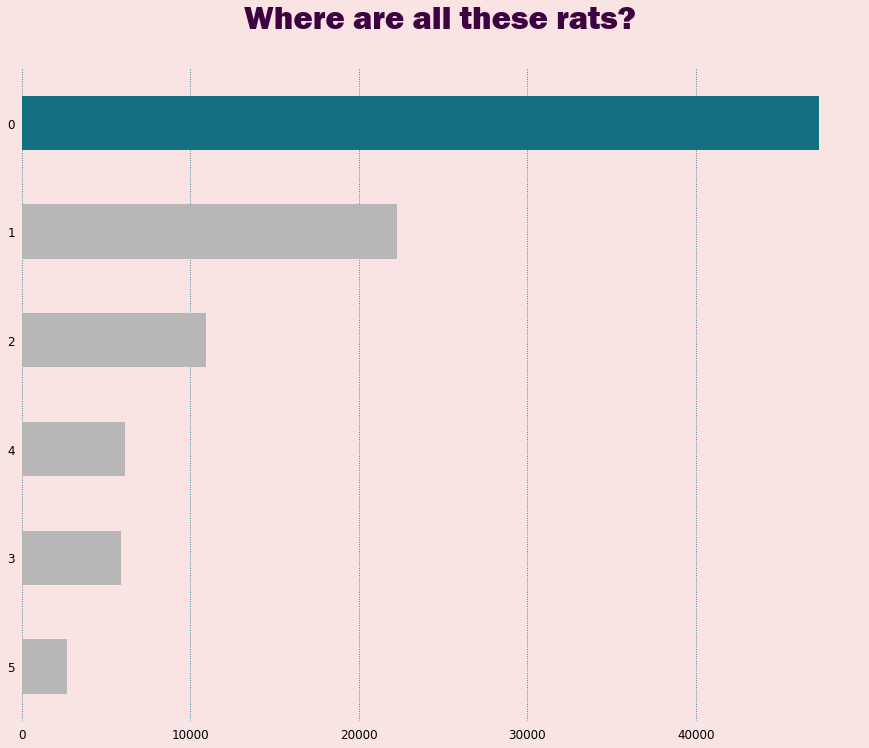

In [83]:
colors = ['#b7b7b7', '#b7b7b7', '#b7b7b7', '#b7b7b7', '#b7b7b7', '#137083']

ax = df_locations.number_of_complaints.sort_values(ascending=True).plot(kind='barh', x='number_of_complaints', y='location_type', figsize=(15,12), color=colors)

ax.set_title('Where are all these rats?', pad=40)
ax.title.set_fontsize(15)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
ax.grid(True, axis='x', color='#137083', linestyle=':', linewidth=0.9)

ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#fae3e3', # colors the outside
    'axes.facecolor': '#fae3e3', # colors the inside 
    'font.size': 12,
    'text.color': '#3d0240' 
})

plt.savefig('rats-location.pdf')

In [65]:
df['Location Type'].value_counts()

3+ Family Apt. Building          47309
1-2 Family Dwelling              22254
Other (Explain Below)            17082
3+ Family Mixed Use Building      8933
Commercial Building               5857
Vacant Lot                        4002
Construction Site                 2663
Vacant Building                   2101
1-2 Family Mixed Use Building     1978
Catch Basin/Sewer                 1197
Parking Lot/Garage                1013
Public Garden                      584
Government Building                314
School/Pre-School                  200
Single Room Occupancy (SRO)        185
Day Care/Nursery                   142
Public Stairs                      132
Office Building                    100
Hospital                            90
Summer Camp                          7
Name: Location Type, dtype: int64

In [82]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,year,month,date
0,15633054,01/01/2010 11:20:45 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11365.0,59-13 159 STREET,...,NaN,NaN,NaN,NaN,40.739983,-73.809299,"(40.73998332248969, -73.80929891501533)",2010,01,2010-01-01 11:20:45
1,15633304,01/02/2010 12:50:36 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10016.0,2 AVENUE,...,NaN,NaN,NaN,NaN,40.743161,-73.976983,"(40.74316088098852, -73.97698314758436)",2010,01,2010-01-02 00:50:36
2,15633594,01/01/2010 03:05:37 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11377.0,31-14 58 STREET,...,NaN,NaN,NaN,NaN,40.756987,-73.903618,"(40.756986581184535, -73.90361811283164)",2010,01,2010-01-01 15:05:37
3,15633599,01/01/2010 08:52:19 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11201.0,NaN,...,NaN,NaN,NaN,NaN,40.688903,-73.980929,"(40.68890317557533, -73.98092864957985)",2010,01,2010-01-01 20:52:19
4,15633605,01/01/2010 04:14:27 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10467.0,2504 BRONX PARK EAST,...,NaN,NaN,NaN,NaN,40.863614,-73.870441,"(40.8636140600279, -73.87044117516707)",2010,01,2010-01-01 16:14:27


In [83]:
df.dtypes

Unique Key                                 int64
Created Date                              object
Closed Date                               object
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                            float64
Status                                    object
Due Date            

In [119]:
df.groupby('Community Board')['Unique Key'].nunique()

Community Board
0 Unspecified                   8
01 BRONX                     1288
01 BROOKLYN                  2699
01 MANHATTAN                  677
01 QUEENS                    1317
01 STATEN ISLAND             2039
02 BRONX                     1053
02 BROOKLYN                  1922
02 MANHATTAN                 1313
02 QUEENS                    1024
02 STATEN ISLAND             1203
03 BRONX                     1495
03 BROOKLYN                  4785
03 MANHATTAN                 2523
03 QUEENS                     911
03 STATEN ISLAND             1462
04 BRONX                     2555
04 BROOKLYN                  3149
04 MANHATTAN                 1405
04 QUEENS                     769
05 BRONX                     2072
05 BROOKLYN                  2007
05 MANHATTAN                  595
05 QUEENS                    2166
06 BRONX                     1702
06 BROOKLYN                  1983
06 MANHATTAN                  819
06 QUEENS                     474
07 BRONX                     211

In [120]:
df1 = df['Community Board'].value_counts().reset_index(name='count')
df1.head(30)

,index,count
0,Unspecified BROOKLYN,9148
1,Unspecified MANHATTAN,7630
2,03 BROOKLYN,4785
3,Unspecified BRONX,4296
4,07 MANHATTAN,3684
5,04 BROOKLYN,3149
6,Unspecified QUEENS,3111
7,10 MANHATTAN,2874
8,12 MANHATTAN,2820
9,08 BROOKLYN,2743


In [121]:
df1 = df1.rename(columns={'index': 'community_board'})
df1.head()

,community_board,count
0,Unspecified BROOKLYN,9148
1,Unspecified MANHATTAN,7630
2,03 BROOKLYN,4785
3,Unspecified BRONX,4296
4,07 MANHATTAN,3684


In [102]:
df['Community Board'].value_counts()

Unspecified BROOKLYN         9148
Unspecified MANHATTAN        7630
03 BROOKLYN                  4785
Unspecified BRONX            4296
07 MANHATTAN                 3684
04 BROOKLYN                  3149
Unspecified QUEENS           3111
10 MANHATTAN                 2874
12 MANHATTAN                 2820
08 BROOKLYN                  2743
01 BROOKLYN                  2699
04 BRONX                     2555
03 MANHATTAN                 2523
12 QUEENS                    2467
08 MANHATTAN                 2339
05 QUEENS                    2166
07 BRONX                     2110
09 BROOKLYN                  2080
05 BRONX                     2072
01 STATEN ISLAND             2039
05 BROOKLYN                  2007
06 BROOKLYN                  1983
09 MANHATTAN                 1970
02 BROOKLYN                  1922
17 BROOKLYN                  1858
12 BRONX                     1727
06 BRONX                     1702
11 BRONX                     1672
11 MANHATTAN                 1599
09 BRONX      

In [103]:
import numpy as np

In [122]:
df1["string"] = df1["community_board"] + ": " + df1["count"].map(str) + np.where(df1["count"]>1, ' complaints', ' complaint')
df1.head()

,community_board,count,string
0,Unspecified BROOKLYN,9148,Unspecified BROOKLYN: 9148 complaints
1,Unspecified MANHATTAN,7630,Unspecified MANHATTAN: 7630 complaints
2,03 BROOKLYN,4785,03 BROOKLYN: 4785 complaints
3,Unspecified BRONX,4296,Unspecified BRONX: 4296 complaints
4,07 MANHATTAN,3684,07 MANHATTAN: 3684 complaints


In [123]:
output = df1.groupby('community_board')['string'].apply(lambda x: "<p>%s</p>" % '</p><p> '.join(x)).reset_index(name='properties.headline')
output

,community_board,properties.headline
0,0 Unspecified,<p>0 Unspecified: 8 complaints</p>
1,01 BRONX,<p>01 BRONX: 1288 complaints</p>
2,01 BROOKLYN,<p>01 BROOKLYN: 2699 complaints</p>
3,01 MANHATTAN,<p>01 MANHATTAN: 677 complaints</p>
4,01 QUEENS,<p>01 QUEENS: 1317 complaints</p>
5,01 STATEN ISLAND,<p>01 STATEN ISLAND: 2039 complaints</p>
6,02 BRONX,<p>02 BRONX: 1053 complaints</p>
7,02 BROOKLYN,<p>02 BROOKLYN: 1922 complaints</p>
8,02 MANHATTAN,<p>02 MANHATTAN: 1313 complaints</p>
9,02 QUEENS,<p>02 QUEENS: 1024 complaints</p>


In [125]:
output.iloc[3]['properties.headline']

'<p>01 MANHATTAN: 677 complaints</p>'

In [126]:
output['count2'] = df1['count']

In [127]:
output.head()

,community_board,properties.headline,count2
0,0 Unspecified,<p>0 Unspecified: 8 complaints</p>,9148
1,01 BRONX,<p>01 BRONX: 1288 complaints</p>,7630
2,01 BROOKLYN,<p>01 BROOKLYN: 2699 complaints</p>,4785
3,01 MANHATTAN,<p>01 MANHATTAN: 677 complaints</p>,4296
4,01 QUEENS,<p>01 QUEENS: 1317 complaints</p>,3684


In [128]:
output['properties.color'] = "#000066"
output.head()

,community_board,properties.headline,count2,properties.color
0,0 Unspecified,<p>0 Unspecified: 8 complaints</p>,9148,#000066
1,01 BRONX,<p>01 BRONX: 1288 complaints</p>,7630,#000066
2,01 BROOKLYN,<p>01 BROOKLYN: 2699 complaints</p>,4785,#000066
3,01 MANHATTAN,<p>01 MANHATTAN: 677 complaints</p>,4296,#000066
4,01 QUEENS,<p>01 QUEENS: 1317 complaints</p>,3684,#000066


In [129]:
def make_color(count2):
    count2 = int(count2)
    if 10000 > count2 > 9000:
        return '#F6CDCB'
    elif 8999 > count2 > 8000:
        return '#F6AFB3'
    elif 7999 > count2 > 7000:
        return '#E97E9A'
    elif 6999 > count2 > 6000:
        return '#B50B75'
    elif 5999 > count2 > 5000:
        return '#923CC3'
    elif 4999 > count2 > 4000:
        return '#373AEB'
    elif 3999 > count2 > 3000:
        return '#373AEB'
    elif 2999 > count2 > 2000:
        return '#373AEB'
    elif 1999 > count2 > 1000:
        return '#373AEB'
    elif 999 > count2:
        return '#373AEB'

In [130]:
output.count2.sort_values(ascending=False)

0     9148
1     7630
2     4785
3     4296
4     3684
5     3149
6     3111
7     2874
8     2820
9     2743
10    2699
11    2555
12    2523
13    2467
14    2339
15    2166
16    2110
17    2080
18    2072
19    2039
20    2007
21    1983
22    1970
23    1922
24    1858
25    1727
26    1702
27    1672
28    1599
29    1547
      ... 
38    1184
39    1085
40    1053
41    1024
42     992
43     911
44     897
45     883
46     859
47     824
48     819
49     810
50     807
51     787
52     769
53     699
54     677
55     669
56     667
57     654
58     595
59     518
60     514
61     474
62     401
63     325
64       8
65       7
66       2
67       1
Name: count2, Length: 68, dtype: int64

In [132]:
df2010 = df[df.year == 2010]
df2010.to_csv("rats-2010.csv")

In [134]:
df.to_csv("rats-with-year.csv")